In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### BLIP CSV separate CSV from other VLMs

In [17]:
#load global step csv to convert from update number to steps
clip_step_csv = pd.read_csv("csv/vlms_no_blip_step.csv")
blip_step_csv = pd.read_csv("csv/blip_steps.csv")
# print(len(clip_step_csv))
# print(len(clip_step_csv.columns)) # num backbones (3) x num reward_funcs (3) x num seeds (2) x csv cols (3) + 1 (step col) = 55
# print(clip_step_csv.columns)
# clip_step_csv.head()
len(clip_step_csv)
len(blip_step_csv)

# removing MAX and MIN cols
clip_step_csv.drop([col for col in clip_step_csv.columns if 'MAX' in col],axis=1,inplace=True)
clip_step_csv.drop([col for col in clip_step_csv.columns if 'MIN' in col],axis=1,inplace=True)
blip_step_csv.drop([col for col in blip_step_csv.columns if 'MAX' in col],axis=1,inplace=True)
blip_step_csv.drop([col for col in blip_step_csv.columns if 'MIN' in col],axis=1,inplace=True)
blip_step_csv.drop([col for col in blip_step_csv.columns if 'itm' in col],axis=1,inplace=True)

In [24]:
#load in reward csv
clip_reward_csv = pd.read_csv("csv/vlms_no_blip_ep_gt_rew_mean.csv")
blip_reward_csv = pd.read_csv("csv/blip_reward.csv")
print(len(clip_reward_csv))
print(len(blip_reward_csv))
# print(len(clip_reward_csv.columns))
# print(clip_reward_csv.columns)
# clip_reward_csv.head()

# removing MAX and MIN cols
clip_reward_csv.drop([col for col in clip_reward_csv.columns if 'MAX' in col],axis=1,inplace=True)
clip_reward_csv.drop([col for col in clip_reward_csv.columns if 'MIN' in col],axis=1,inplace=True)
blip_reward_csv.drop([col for col in blip_reward_csv.columns if 'MAX' in col],axis=1,inplace=True)
blip_reward_csv.drop([col for col in blip_reward_csv.columns if 'MIN' in col],axis=1,inplace=True)
blip_reward_csv.drop([col for col in blip_reward_csv.columns if 'itm' in col],axis=1,inplace=True)
clip_reward_csv = clip_reward_csv.interpolate(method='linear')
blip_reward_csv = blip_reward_csv.interpolate(method='linear')

1829
915


#### Env Reward Global Step & Reward

In [10]:
#load global step csv to convert from update number to steps
gt_step_csv = pd.read_csv("csv/cartpole_gt_global_step.csv")
print(len(gt_step_csv))
# gt_step_csv.head()
#load in reward csv
gt_reward_csv = pd.read_csv("csv/cartpole_gt_ep_rew_mean.csv")
print(len(gt_reward_csv))
gt_reward_csv.head()

468
468


,Step,CartPole_env_reward_20240422_232316 - rollout/ep_rew_mean,CartPole_env_reward_20240422_232316 - rollout/ep_rew_mean__MIN,CartPole_env_reward_20240422_232316 - rollout/ep_rew_mean__MAX
0,0,31.812500,31.812500,31.812500
1,1,30.734375,30.734375,30.734375
2,2,31.572916,31.572916,31.572916
3,3,30.790001,30.790001,30.790001
4,4,30.250000,30.250000,30.250000


In [32]:
# convert step col to global step 
clip_reward_csv["Step"] = clip_step_csv[clip_step_csv.columns[1]]
gt_reward_csv["Step"] = gt_step_csv[gt_step_csv.columns[1]]

In [25]:
# rename so all CLIP cols are same model name
def rename_clip(name):
    if "laion400m" in name:
        # getting reward func
        if "cosine" in name:
            r = "cosine"
        elif "contrastive" in name:
            r = "contrastive"
        elif "goal_baseline" in name:
            r = "goal_baseline_reg"
        return f"CartPole_CLIPConvNext_{r}"
    else:
        return name

clip_reward_csv = clip_reward_csv.rename(columns=rename_clip)
clip_reward_csv.columns

Index(['Step',
       'CartPole_flava-full_contrastive_20240425_151959 - rollout/ep_gt_rew_mean',
       'CartPole_flava-full_contrastive_20240425_151531 - rollout/ep_gt_rew_mean',
       'CartPole_flava-full_goal_baseline_reg_20240425_150737 - rollout/ep_gt_rew_mean',
       'CartPole_flava-full_goal_baseline_reg_20240425_150202 - rollout/ep_gt_rew_mean',
       'CartPole_flava-full_cosine_20240425_143913 - rollout/ep_gt_rew_mean',
       'CartPole_flava-full_cosine_20240425_142155 - rollout/ep_gt_rew_mean',
       'CartPole_siglip-base-patch16-224k_cosine_20240425_062033 - rollout/ep_gt_rew_mean',
       'CartPole_siglip-base-patch16-224k_cosine_20240425_061736 - rollout/ep_gt_rew_mean',
       'CartPole_siglip-base-patch16-224k_contrastive_20240425_061326 - rollout/ep_gt_rew_mean',
       'CartPole_siglip-base-patch16-224k_contrastive_20240425_060203 - rollout/ep_gt_rew_mean',
       'CartPole_siglip-base-patch16-224k_goal_baseline_reg_20240425_053932 - rollout/ep_gt_rew_mean',
    

In [31]:
clip_step_csv.columns

Index(['Step', 'CartPole_flava-full_contrastive_20240425_151959 - global_step',
       'CartPole_flava-full_contrastive_20240425_151531 - global_step',
       'CartPole_flava-full_goal_baseline_reg_20240425_150737 - global_step',
       'CartPole_flava-full_goal_baseline_reg_20240425_150202 - global_step',
       'CartPole_flava-full_cosine_20240425_143913 - global_step',
       'CartPole_flava-full_cosine_20240425_142155 - global_step',
       'CartPole_siglip-base-patch16-224k_cosine_20240425_062033 - global_step',
       'CartPole_siglip-base-patch16-224k_cosine_20240425_061736 - global_step',
       'CartPole_siglip-base-patch16-224k_contrastive_20240425_061326 - global_step',
       'CartPole_siglip-base-patch16-224k_contrastive_20240425_060203 - global_step',
       'CartPole_siglip-base-patch16-224k_goal_baseline_reg_20240425_053932 - global_step',
       'CartPole_laion400m_s13b_b51k_contrastive_20240425_053236 - global_step',
       'CartPole_laion400m_s13b_b51k_goal_baseline_

In [43]:
blip_step_csv.columns

Index(['Step',
       'CartPole_blip-image-captioning-base_contrastive_20240426_164200 - global_step',
       'CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_155300 - global_step',
       'CartPole_blip-image-captioning-base_cosine_20240426_154807 - global_step',
       'CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - global_step',
       'CartPole_blip-image-captioning-base_contrastive_20240426_052047 - global_step',
       'CartPole_blip-image-captioning-base_cosine_20240425_192124 - global_step'],
      dtype='object')

### Plotting

In [26]:
def moving_window_average(data, window_size):
    """Smooth data with moving window average."""
    if window_size <= 1:
        return data
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'same')

In [50]:
# given a reward function and all the data, plot one line for each reward function
def plot_by_r(reward_func):
    smooth_factor = 1
    models = ["siglip", "ConvNext", "flava"]
    plt.figure(figsize=(10, 5))

    # plotting for non-BLIP models
    for m in models:
        model_columns = [col for col in clip_reward_csv.columns if reward_func in col and m in col]
        means = clip_reward_csv[model_columns].mean(axis=1)
        stds = clip_reward_csv[model_columns].std(axis=1)
        # Apply smoothing
        smoothed_means = moving_window_average(means, smooth_factor)

        # Plot means as main line
        if m == "siglip":
            if reward_func == "contrastive":
                x = clip_step_csv['CartPole_siglip-base-patch16-224k_contrastive_20240425_061326 - global_step']
            elif reward_func == "cosine":
                x = clip_step_csv['CartPole_siglip-base-patch16-224k_cosine_20240425_061736 - global_step']
            elif reward_func == "goal_baseline_reg":
                x = clip_step_csv['CartPole_siglip-base-patch16-224k_goal_baseline_reg_20240425_053932 - global_step']
        elif m == "ConvNext":
            if reward_func == "contrastive":
                x = clip_step_csv['CartPole_CLIPConvNext_contrastive_20240423_123355 - global_step']
            elif reward_func == "cosine":
                x = clip_step_csv['CartPole_CLIPConvNext_cosine_20240422_093220 - global_step']
            elif reward_func == "goal_baseline_reg":
                x = clip_step_csv['CartPole_CLIPConvNext_goal_baseline_1.0_reg_20240422_124730 - global_step']
        elif m == "flava":
            if reward_func == "contrastive":
                x = clip_step_csv['CartPole_flava-full_contrastive_20240425_151531 - global_step']
            elif reward_func == "cosine":
                x = clip_step_csv['CartPole_flava-full_cosine_20240425_143913 - global_step']
            elif reward_func == "goal_baseline_reg":
                x = clip_step_csv['CartPole_flava-full_goal_baseline_reg_20240425_150202 - global_step']
        plt.plot(x, smoothed_means, label=f'{"CLIP" if m == "ConvNext" else m}')
        # Fill between mean ± std
        plt.fill_between(x, smoothed_means-stds, smoothed_means+stds, alpha=0.2)

    # Plotting blip from other df
    blip_cols = [col for col in blip_reward_csv.columns if reward_func in col]
    means = blip_reward_csv[blip_cols].mean(axis=1)
    stds = blip_reward_csv[blip_cols].std(axis=1)
    # Apply smoothing
    smoothed_means = moving_window_average(means, smooth_factor)
    blip_xs = {"contrastive": "CartPole_blip-image-captioning-base_contrastive_20240426_164200 - global_step",
              "cosine": "CartPole_blip-image-captioning-base_cosine_20240426_154807 - global_step",
              "goal_baseline_reg": "CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - global_step"}
    x = blip_step_csv[blip_xs[reward_func]]
    plt.plot(x, smoothed_means, label='BLIP')
    # Fill between mean ± std
    plt.fill_between(x, smoothed_means-stds, smoothed_means+stds, alpha=0.2)
    
    # Plotting env reward
    # TODO: add in second run
    env_reward = gt_reward_csv["CartPole_env_reward_20240422_232316 - rollout/ep_rew_mean"]
    plt.plot(gt_reward_csv["Step"], env_reward, label="Environment Reward")
    
    # Labeling the plot
    plt.xlabel('Step')
    plt.ylabel('Episode Reward')
    if reward_func == 'goal_baseline_reg':
        title = "Goal-Baseline-Regularized"
    else:
        title = reward_func.capitalize()
    plt.title(f'{title} Reward')
    plt.legend()
    plt.show()

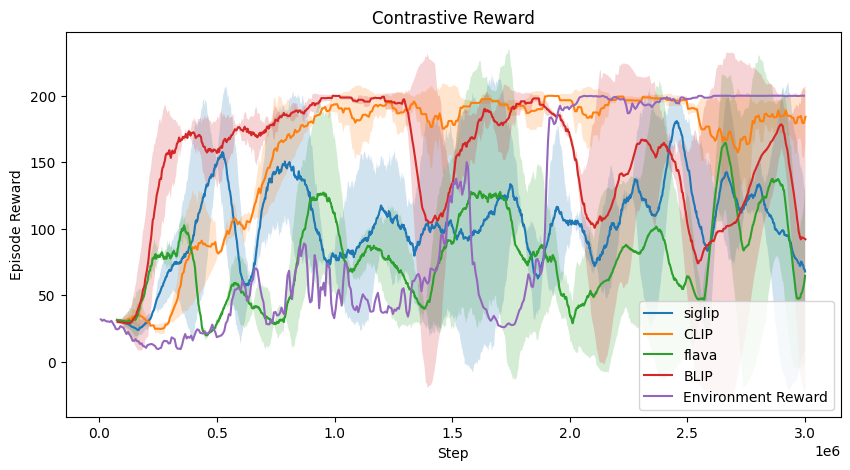

In [51]:
plot_by_r("contrastive")

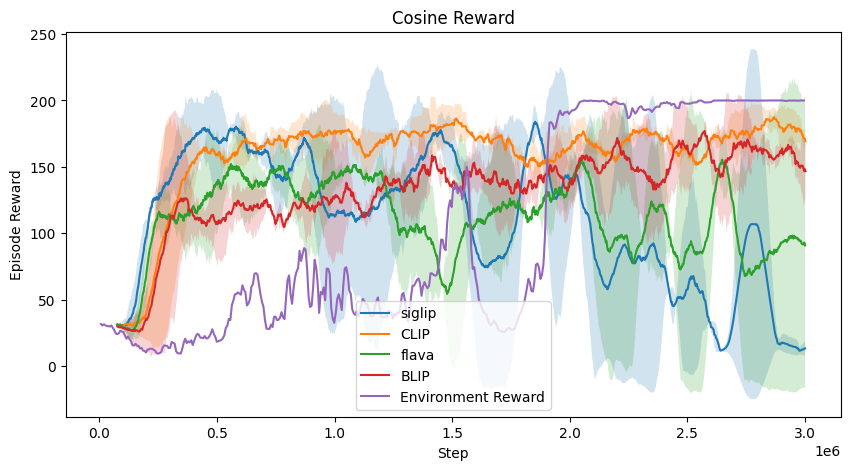

In [52]:
plot_by_r("cosine")

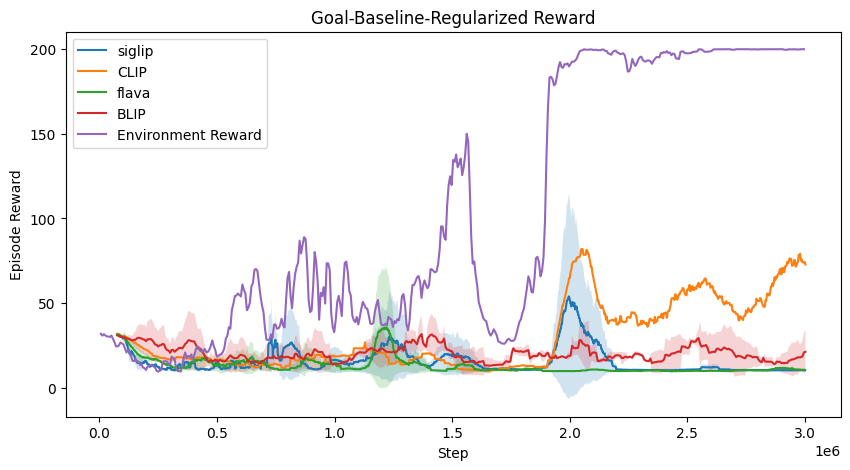

In [53]:
plot_by_r("goal_baseline_reg")

In [62]:
# given a reward function and all the data, plot one line for each reward function
def plot_by_m(m):
    smooth_factor = 1
    rewards = ["goal_baseline_reg", "cosine", "contrastive"]
    plt.figure(figsize=(10, 5))

    df = clip_reward_csv if not m == "blip" else blip_reward_csv
    # plotting for non-BLIP models
    for reward_func in rewards:
        model_columns = [col for col in df.columns if reward_func in col and m in col]
        means = df[model_columns].mean(axis=1)
        stds = df[model_columns].std(axis=1)
        # Apply smoothing
        smoothed_means = moving_window_average(means, smooth_factor)

        if not m == "blip":
            # Plot means as main line
            if m == "siglip":
                if reward_func == "contrastive":
                    x = clip_step_csv['CartPole_siglip-base-patch16-224k_contrastive_20240425_061326 - global_step']
                elif reward_func == "cosine":
                    x = clip_step_csv['CartPole_siglip-base-patch16-224k_cosine_20240425_061736 - global_step']
                elif reward_func == "goal_baseline_reg":
                    x = clip_step_csv['CartPole_siglip-base-patch16-224k_goal_baseline_reg_20240425_053932 - global_step']
            elif m == "ConvNext":
                if reward_func == "contrastive":
                    x = clip_step_csv['CartPole_CLIPConvNext_contrastive_20240423_123355 - global_step']
                elif reward_func == "cosine":
                    x = clip_step_csv['CartPole_CLIPConvNext_cosine_20240422_093220 - global_step']
                elif reward_func == "goal_baseline_reg":
                    x = clip_step_csv['CartPole_CLIPConvNext_goal_baseline_1.0_reg_20240422_124730 - global_step']
            elif m == "flava":
                if reward_func == "contrastive":
                    x = clip_step_csv['CartPole_flava-full_contrastive_20240425_151531 - global_step']
                elif reward_func == "cosine":
                    x = clip_step_csv['CartPole_flava-full_cosine_20240425_143913 - global_step']
                elif reward_func == "goal_baseline_reg":
                    x = clip_step_csv['CartPole_flava-full_goal_baseline_reg_20240425_150202 - global_step']
        else:
            blip_xs = {"contrastive": "CartPole_blip-image-captioning-base_contrastive_20240426_164200 - global_step",
              "cosine": "CartPole_blip-image-captioning-base_cosine_20240426_154807 - global_step",
              "goal_baseline_reg": "CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - global_step"}
            x = blip_step_csv[blip_xs[reward_func]]
        plt.plot(x, smoothed_means, label=reward_func)
        # Fill between mean ± std
        plt.fill_between(x, smoothed_means-stds, smoothed_means+stds, alpha=0.2)

    # Plotting blip from other df
    # blip_cols = [col for col in blip_reward_csv.columns if reward_func in col]
    # means = blip_reward_csv[blip_cols].mean(axis=1)
    # stds = blip_reward_csv[blip_cols].std(axis=1)
    # # Apply smoothing
    # smoothed_means = moving_window_average(means, smooth_factor)
    # blip_xs = {"contrastive": "CartPole_blip-image-captioning-base_contrastive_20240426_164200 - global_step",
    #           "cosine": "CartPole_blip-image-captioning-base_cosine_20240426_154807 - global_step",
    #           "goal_baseline_reg": "CartPole_blip-image-captioning-base_goal_baseline_reg_20240426_103506 - global_step"}
    # x = blip_step_csv[blip_xs[reward_func]]
    # plt.plot(x, smoothed_means, label='BLIP')
    # # Fill between mean ± std
    # plt.fill_between(x, smoothed_means-stds, smoothed_means+stds, alpha=0.2)
    
    # Plotting env reward
    # TODO: add in second run
    env_reward = gt_reward_csv["CartPole_env_reward_20240422_232316 - rollout/ep_rew_mean"]
    plt.plot(gt_reward_csv["Step"], env_reward, label="Environment Reward")
    
    # Labeling the plot
    plt.xlabel('Step')
    plt.ylabel('Episode Reward')
    title = m.upper() if not m == "ConvNext" else "CLIP"
    plt.title(f'{title} Reward')
    plt.legend()
    plt.show()

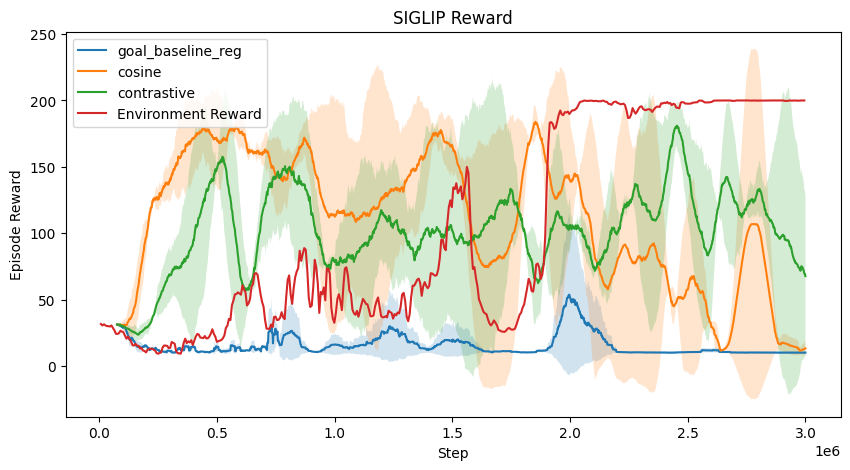

In [63]:
plot_by_m("siglip")

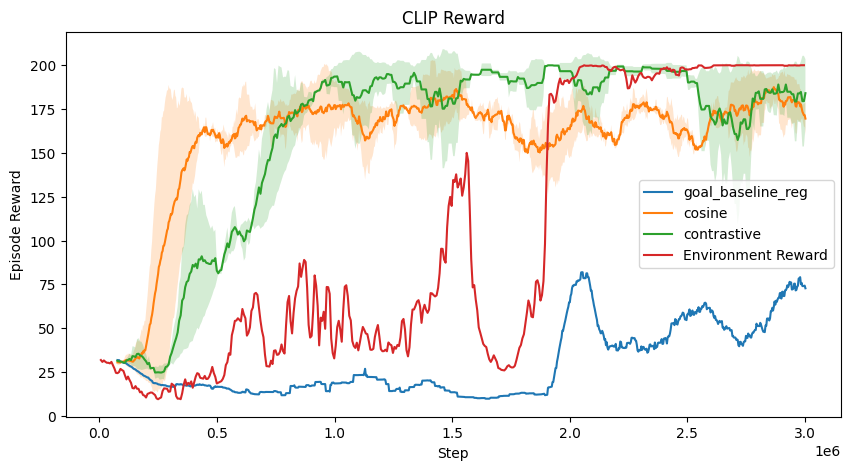

In [64]:
plot_by_m("ConvNext")

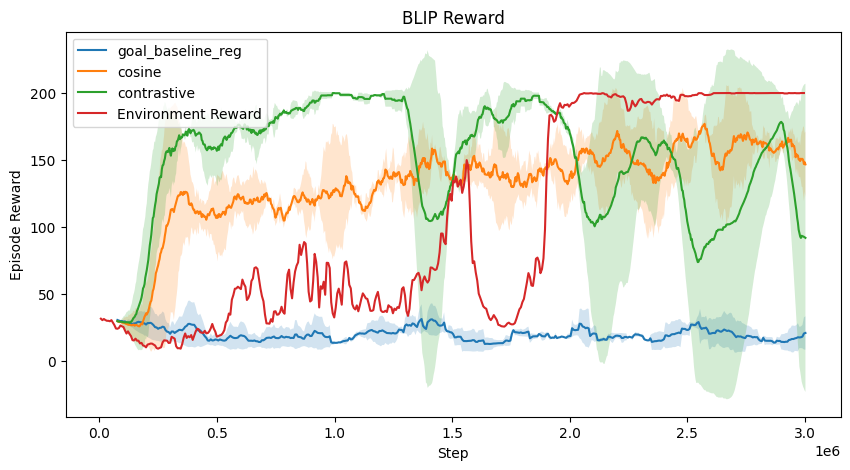

In [65]:
plot_by_m("blip")

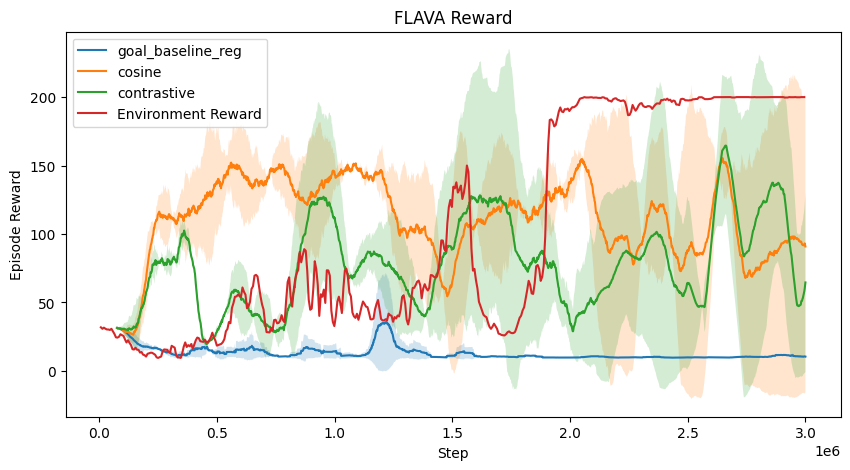

In [66]:
plot_by_m("flava")